# Silver Screen Success: Unraveling Patterns in Movie Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import sqlite3
import matplotlib.pyplot as plt
from pathlib import Path
from pandas.io.html import read_html

url = 'https://www.boxofficemojo.com/showdown/?ref_=bo_nb_shs_tab'

In [2]:
# Read data from the webpage

In [4]:
box_office_showdowns = pd.read_html(url)

In [5]:
#Print the head and the tail to inspect the data

In [6]:
box_office_showdowns[0].head(10)

,Showdown,Num Releases,Total Gross,#1 Release,Gross
0,12 Years of Nancy Meyers,4,"$376,453,634",Something's Gotta Give,"$124,728,738"
1,2011 Winter/Spring Thrills,5,"$318,152,924",Limitless,"$79,249,455"
2,'2012' Vs. 'Interstellar',2,"$354,132,184",Interstellar,"$188,020,017"
3,2014 Superhero Showdown,4,"$1,029,718,639",Guardians of the Galaxy,"$333,176,600"
4,2015 Domestic Underperformers,5,"$321,790,869",Tomorrowland,"$93,436,322"
5,2016 Superhero Openers,6,"$1,814,699,715",Captain America: Civil War,"$408,084,349"
6,2016 Superhero Showdown,6,"$1,814,699,715",Captain America: Civil War,"$408,084,349"
7,2017 Cars Showdown,2,"$344,353,511",Cars 2,"$191,452,396"
8,2017 Superhero Summer Slam,3,"$1,136,577,649",Wonder Woman,"$412,563,408"
9,3D Concert Clash,6,"$283,748,892",Justin Bieber: Never Say Never,"$73,013,910"


In [7]:
box_office_showdowns[0].tail(10)

,Showdown,Num Releases,Total Gross,#1 Release,Gross
572,Wonder Woman vs. Mockingjay 2,2,"$694,287,310",Wonder Woman,"$412,563,408"
573,World War II Showdown,6,"$626,715,254",Saving Private Ryan,"$216,540,909"
574,'Wrath of the Titans' Vs. 'Hercules',2,"$156,358,697",Wrath of the Titans,"$83,670,083"
575,Xander vs. Riddick,5,"$326,034,601",xXx,"$142,109,382"
576,"X-Men: First, Days & Apocalypse",3,"$535,772,328",X-Men: Days of Future Past,"$233,921,534"
577,X-Men Vs. X-Men,6,"$1,065,460,188",X-Men: The Last Stand,"$234,362,462"
578,X-Philes Vs. Browncoats,3,"$130,395,308",The X Files,"$83,898,313"
579,'Zombieland' Vs. 'Warm Bodies',2,"$141,970,948",Zombieland,"$75,590,286"
580,Zombieland v Zombieland,2,"$148,713,368",Zombieland,"$75,590,286"
581,Zombie Showdown,6,"$321,645,999",Zombieland,"$75,590,286"


In [8]:
# Convert the box office showdowns data to dataframe for easy manipulation

In [9]:
box_office_showdowns = pd.DataFrame(box_office_showdowns[0])

In [10]:
box_office_showdowns.dtypes

Showdown        object
Num Releases     int64
Total Gross     object
#1 Release      object
Gross           object
dtype: object

In [11]:
box_office_showdowns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Showdown      582 non-null    object
 1   Num Releases  582 non-null    int64 
 2   Total Gross   582 non-null    object
 3   #1 Release    582 non-null    object
 4   Gross         582 non-null    object
dtypes: int64(1), object(4)
memory usage: 22.9+ KB


# Data Preprocessing and cleaning

In [12]:
# Rename the variables to avoid conflict during analysis

In [13]:
box_office_showdowns.rename(columns={'Num Releases': 'Num_of_release'}, inplace = True)
box_office_showdowns.rename(columns={'Total Gross': 'Total_gross'}, inplace = True)
box_office_showdowns.rename(columns={'#1 Release': 'First_release'}, inplace = True)

In [14]:
box_office_showdowns.dtypes

Showdown          object
Num_of_release     int64
Total_gross       object
First_release     object
Gross             object
dtype: object

In [16]:
# Remove all the special characters and alphabets from the two numeric columns

In [17]:
for column in box_office_showdowns.columns:
    box_office_showdowns['Total_gross'] = box_office_showdowns['Total_gross'].str.replace(r'\D', '', regex=True)
    box_office_showdowns['Gross'] = box_office_showdowns['Gross'].str.replace(r'\D', '', regex=True)

In [18]:
box_office_showdowns

,Showdown,Num_of_release,Total_gross,First_release,Gross
0,12 Years of Nancy Meyers,4,376453634,Something's Gotta Give,124728738
1,2011 Winter/Spring Thrills,5,318152924,Limitless,79249455
2,'2012' Vs. 'Interstellar',2,354132184,Interstellar,188020017
3,2014 Superhero Showdown,4,1029718639,Guardians of the Galaxy,333176600
4,2015 Domestic Underperformers,5,321790869,Tomorrowland,93436322
...,...,...,...,...,...
577,X-Men Vs. X-Men,6,1065460188,X-Men: The Last Stand,234362462
578,X-Philes Vs. Browncoats,3,130395308,The X Files,83898313
579,'Zombieland' Vs. 'Warm Bodies',2,141970948,Zombieland,75590286
580,Zombieland v Zombieland,2,148713368,Zombieland,75590286


In [19]:
# Convert the 'Total_gross' and 'Gross' columns to float to avoid conflict during analysis

In [20]:
box_office_showdowns['Total_gross'] = box_office_showdowns['Total_gross'].astype(float)
box_office_showdowns['Gross'] = box_office_showdowns['Gross'].astype(float)

In [21]:
box_office_showdowns.dtypes

Showdown           object
Num_of_release      int64
Total_gross       float64
First_release      object
Gross             float64
dtype: object

In [22]:
# Convert the already cleaned dataset to a csv file

In [23]:
box_office_showdowns.to_csv("box_office_showdowns.csv", header=True, index=False)

In [24]:
# The next line of code reads the csv file

In [25]:
box_off_showdowns = pd.read_csv('box_office_showdowns.csv')

In [26]:
box_off_showdowns.head(20) # Shows the first 20 records of the CSV data file

,Showdown,Num_of_release,Total_gross,First_release,Gross
0,12 Years of Nancy Meyers,4,3.764536e+08,Something's Gotta Give,124728738.0
1,2011 Winter/Spring Thrills,5,3.181529e+08,Limitless,79249455.0
2,'2012' Vs. 'Interstellar',2,3.541322e+08,Interstellar,188020017.0
3,2014 Superhero Showdown,4,1.029719e+09,Guardians of the Galaxy,333176600.0
4,2015 Domestic Underperformers,5,3.217909e+08,Tomorrowland,93436322.0
5,2016 Superhero Openers,6,1.814700e+09,Captain America: Civil War,408084349.0
6,2016 Superhero Showdown,6,1.814700e+09,Captain America: Civil War,408084349.0
7,2017 Cars Showdown,2,3.443535e+08,Cars 2,191452396.0
8,2017 Superhero Summer Slam,3,1.136578e+09,Wonder Woman,412563408.0
9,3D Concert Clash,6,2.837489e+08,Justin Bieber: Never Say Never,73013910.0


In [27]:
# Divides the 'Total_gross' and 'Gross' columns by 1000000 to store the values in million

In [28]:
box_off_showdowns['Total_gross'] = box_off_showdowns['Total_gross']/1000000

In [29]:
box_off_showdowns['Gross'] = box_off_showdowns['Gross']/1000000

In [30]:
# Rename the 'Total_gross' and 'Gross' column to indicate that the data therein are stored in million

In [31]:
box_off_showdowns.rename(columns = {'Total_gross': 'Total_gross_in_million'}, inplace =True)
box_off_showdowns.rename(columns = {'Gross': 'Gross_in_million'}, inplace = True)

In [32]:
box_off_showdowns # Write the dataframe out

,Showdown,Num_of_release,Total_gross_in_million,First_release,Gross_in_million
0,12 Years of Nancy Meyers,4,376.453634,Something's Gotta Give,124.728738
1,2011 Winter/Spring Thrills,5,318.152924,Limitless,79.249455
2,'2012' Vs. 'Interstellar',2,354.132184,Interstellar,188.020017
3,2014 Superhero Showdown,4,1029.718639,Guardians of the Galaxy,333.176600
4,2015 Domestic Underperformers,5,321.790869,Tomorrowland,93.436322
...,...,...,...,...,...
577,X-Men Vs. X-Men,6,1065.460188,X-Men: The Last Stand,234.362462
578,X-Philes Vs. Browncoats,3,130.395308,The X Files,83.898313
579,'Zombieland' Vs. 'Warm Bodies',2,141.970948,Zombieland,75.590286
580,Zombieland v Zombieland,2,148.713368,Zombieland,75.590286


# EXPLORATORY DATA ANALYSIS

In [33]:
box_off_showdowns.describe()

,Num_of_release,Total_gross_in_million,Gross_in_million
count,582.000000,582.000000,582.000000
mean,3.922680,689.949153,221.357391
std,1.615076,683.315223,178.630770
min,2.000000,6.144486,3.125613
25%,3.000000,252.225832,102.086322
50%,4.000000,464.882088,169.106725
75%,5.000000,839.030913,292.576195
max,11.000000,4211.347190,936.662225


# The mean and the median of 'Total_gross' stands at 690 and 465 million respectively.

# While the mean and the median of Gross stands at 221 and 169 million respectively

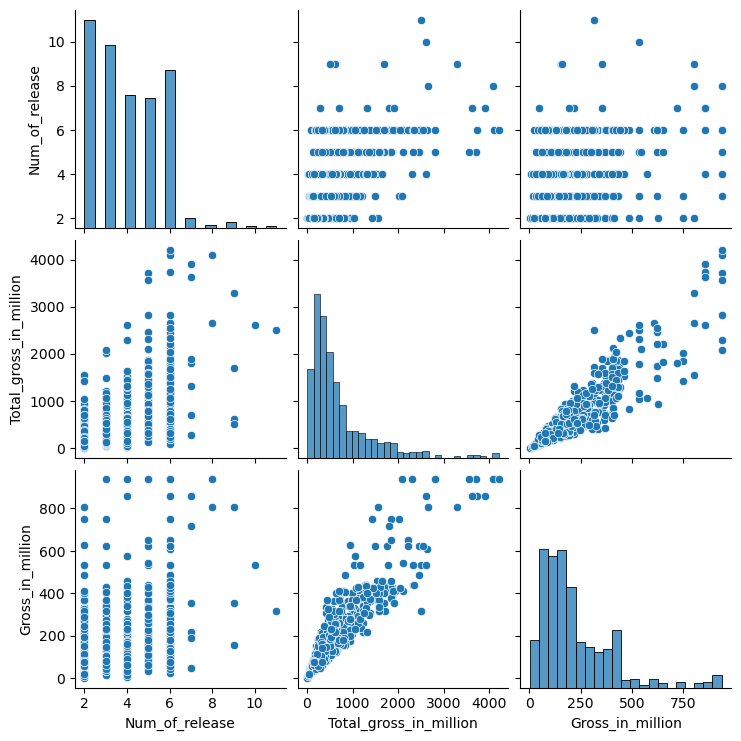

In [35]:
sns.pairplot(box_off_showdowns) # Create a pair plot to visualise a posible relationship between the variables

In [36]:
# Plot the distribution of Gross and Total Gross

C:\Users\MTN-SIMREG\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\MTN-SIMREG\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


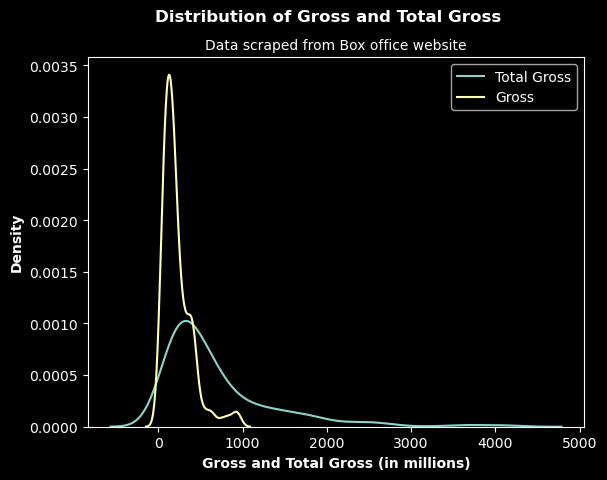

In [37]:
plt.show()

In [38]:
# Plot the boxplot to visualise the median class of all the categories of Release

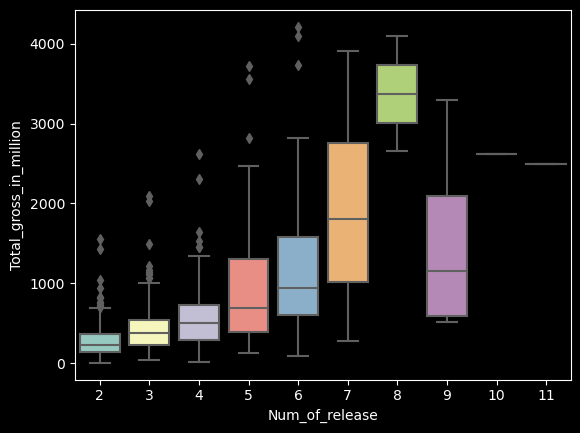

In [39]:
sns.boxplot(x="Num_of_release", y="Total_gross_in_million", data=box_off_showdowns)
plt.show()

In [40]:
# Further examine the characteristics of each category of Release

In [41]:
means = box_off_showdowns.groupby('Num_of_release')['Total_gross_in_million'].mean() #mean value of each group of release
means 

Num_of_release
2      303.601913
3      449.393561
4      618.156029
5      920.006570
6     1157.011586
7     1934.276549
8     3371.395855
9     1531.712848
10    2617.100116
11    2498.691635
Name: Total_gross_in_million, dtype: float64

In [42]:
medians = box_off_showdowns.groupby('Num_of_release')['Total_gross_in_million'].median() # median value of each group of release
medians

Num_of_release
2      234.919551
3      383.205899
4      506.556940
5      687.066000
6      937.493864
7     1801.302045
8     3371.395855
9     1156.518556
10    2617.100116
11    2498.691635
Name: Total_gross_in_million, dtype: float64

In [43]:
counts = box_off_showdowns.groupby('Num_of_release')['Total_gross_in_million'].count() # frequency of each group of release
counts

Num_of_release
2     145
3     128
4      93
5      91
6     110
7       7
8       2
9       4
10      1
11      1
Name: Total_gross_in_million, dtype: int64

C:\Users\MTN-SIMREG\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\MTN-SIMREG\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


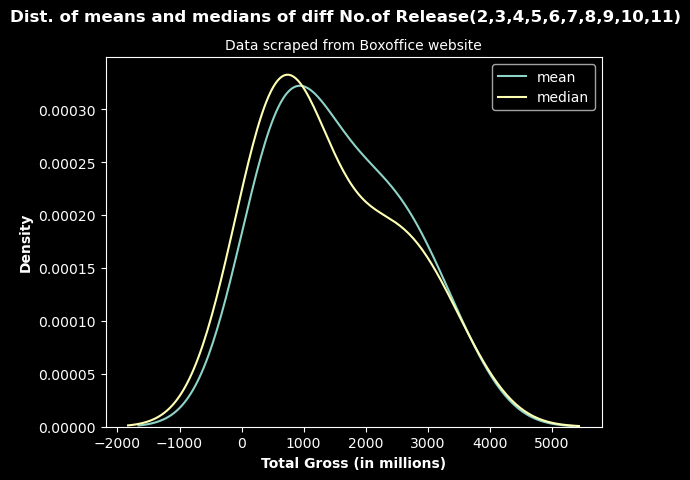

In [44]:
plt.style.use('dark_background')
plt.suptitle('Dist. of means and medians of diff No.of Release(2,3,4,5,6,7,8,9,10,11)', weight='bold', color ='white').set_fontsize(12)
plt.title('Data scraped from Boxoffice website', color = 'white').set_fontsize(10)
sns.distplot(means, kde=True, hist=False, label='mean')
sns.distplot(medians, kde=True, hist=False, label='median')
plt.xlabel('Total Gross (in millions)', weight = 'bold', color = 'white')
plt.ylabel('Density', weight = 'bold', color = 'white')
plt.xticks(color = 'white')
plt.yticks(color = 'white')
plt.legend()
plt.show()

In [45]:
# Create SLQ connection to create queries and extract data

In [48]:
Path('box_off_showdowns.db').touch()
switch_conn = sqlite3.connect('box_off_showdowns.db')
switch_c = switch_conn.cursor()
switch_c.execute('''CREATE TABLE box_off_showdowns_tabs (Showdown text, Num_of_release real, Total_gross_in_million real, First_release text, Gross_in_million real)''')

In [49]:
box_off_showdowns.to_sql('box_off_showdowns_tabs', switch_conn, if_exists = 'append', index=False)

582

In [50]:
highest_total_gross = pd.read_sql('''SELECT Showdown, Num_of_release, Total_gross_in_million FROM box_off_showdowns_tabs
WHERE Total_gross_in_million>2000
ORDER BY Total_gross_in_million DESC''', switch_conn)

In [52]:
highest_total_gross.head(10)

,Showdown,Num_of_release,Total_gross_in_million
0,Opening Weekend Showdown,6.0,4211.347190
1,All Time Grossers,6.0,4096.085314
2,All Time Openers,8.0,4091.545218
3,Multiverse vs. MCU,7.0,3910.558344
4,MCU Top Openers,6.0,3727.696175
5,Avengers v. Star Wars,5.0,3717.389999
6,Tom Holland Blockbusters,7.0,3623.448353
7,King Size Domestic Grosses,5.0,3562.739956
8,Spidey Showdown,9.0,3298.475111
9,Star Wars 2015-2019,5.0,2817.990985


In [53]:
myCorrelation = box_off_showdowns.corr()
myCorrelation

,Num_of_release,Total_gross_in_million,Gross_in_million
Num_of_release,1.000000,0.553907,0.302552
Total_gross_in_million,0.553907,1.000000,0.906487
Gross_in_million,0.302552,0.906487,1.000000


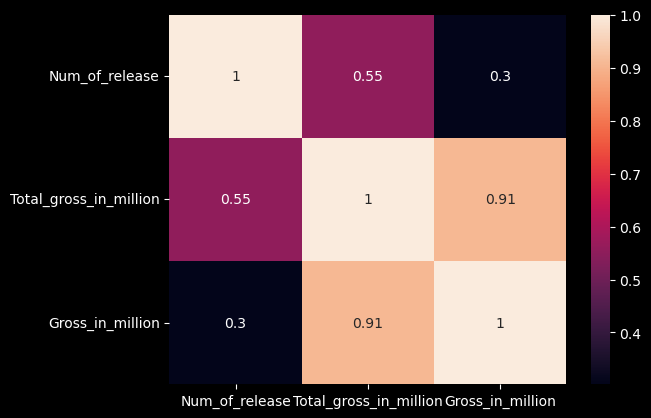

In [54]:
sns.heatmap(myCorrelation, annot=True)
plt.show()

In [55]:
sums = box_off_showdowns.groupby('Num_of_release')['Total_gross_in_million'].sum()
sums

Num_of_release
2      44022.277410
3      57522.375811
4      57488.510693
5      83720.597861
6     127271.274461
7      13539.935845
8       6742.791711
9       6126.851392
10      2617.100116
11      2498.691635
Name: Total_gross_in_million, dtype: float64